In [58]:
import matplotlib.pyplot as plt
import numpy as np
from utils.utils_vis import axis_font_size, ticks_font_size, title_font_size, width_in_inches, param_names, param_units
import os
import pickle
import cv2
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab10.colors)
# plt.style.use('seaborn-v0_8-whitegrid')
# get tab10 colors as a list:
colors_tab10 = plt.cm.tab10.colors
save = True
if save:
    outpath = "output/vis_report_final"
    for subfolder in ["methods", "aleatoric", "epistemic", "vivo", "appendix"]:
        if not os.path.exists(f"{outpath}/{subfolder}"):
            os.makedirs(f"{outpath}/{subfolder}")

inv_param_units = ["$min$", "$min^{-1}$", "", ""]

In [ ]:
# HISTOGRAMS
        
# normal = {
#     # "train": np.load("data/sim/normal/train.npz"),
#     "test": np.load("data/sim/normal/test.npz")
# }

# ood = {
#     "train": np.load("data/sim/normal_ood/train.npz"),
#     # "test": np.load("data/sim/normal_ood/test.npz")
# }

# def plot(data, title, vis_test=False):

#     # plot histograms of train and test data
#     fig, axs = plt.subplots(2, 2, dpi=1000, sharey=True)
#     fig.set_size_inches(width_in_inches, width_in_inches)
#     fig.suptitle(title, fontsize=title_font_size)
#     for i, ax in enumerate(axs.flat):
#         hist1 = ax.hist(data["train"]["params"][:, i], bins=100, alpha=0.5, label="train")
#         if vis_test:
#             hist2= ax.hist(data["test"]["params"][:, i], bins=100, alpha=0.5, label="test")


#         ax.set_title(param_names[i], fontsize=title_font_size)
#         # if i == 0:
#         #     ax.legend()
#         if i in [0,2]:
#             ax.set_ylabel("N", fontsize=axis_font_size, rotation=0, labelpad=10)
#         if i in [2,3]:
#             ax.set_xlabel("Value", fontsize=axis_font_size)

#         # lower density of y ticks
#         ax.yaxis.set_major_locator(plt.MaxNLocator(4))

#     plt.tight_layout()



# fig_normal = plot(normal, "Parameter distributions of simulated data-set \n using a learned prior")
# if save:
#     plt.savefig(f"{outpath}/methods/hist_normal.jpg", dpi=1000, format="jpg")
# fig_ood = plot(ood, "Train and test distributions of a simulated out-of-distribution dataset", vis_test=True)
# if save:
#     plt.savefig(f"{outpath}/methods/hist_ood.jpg", dpi=1000, format="jpg")


In [60]:
normal = np.load('data/sim/normal/test.npz')
ood = np.load('data/sim/normal_ood/train.npz')
title = "Normalised parameter distributions of simulated datasets"

# fig, axs = plt.subplots(2, 2, dpi=1000, sharey=False)
# fig.set_size_inches(width_in_inches, width_in_inches*5/7)
# # fig.suptitle(title, fontsize=title_font_size, y=1)
# for i, axi in enumerate(axs.flat):
#     hist_normal = axi.hist(normal["params"][:, i], bins=100, alpha=1.0, label="normal", density=True)
#     hist_ood = axi.hist(ood["params"][:, i], bins=100, alpha=0.7, label="ood", density=True)
#     axi.set_title(param_names[i], fontsize=title_font_size)
#     # if i in [0,2]:
#         # axi.set_ylabel("N", fontsize=axis_font_size, rotation=0, labelpad=10)
#     # if i in [2,3]:
#     axi.set_xlabel(param_units[i], fontsize=axis_font_size)
#     axi.yaxis.set_major_locator(plt.MaxNLocator(2))

# # add some horizontal space between subplots
# fig.subplots_adjust(hspace=0.5)
# fig.legend(
#     ["Normal train / test set", "OOD train set"], 
#     loc="lower center", 
#     fontsize=axis_font_size, 
#     ncol=2, 
#     bbox_to_anchor=(0.5, -0.05))

# if save:
#     plt.savefig(f"{outpath}/methods/histograms.jpg", dpi=1000, format="jpg", bbox_inches='tight')

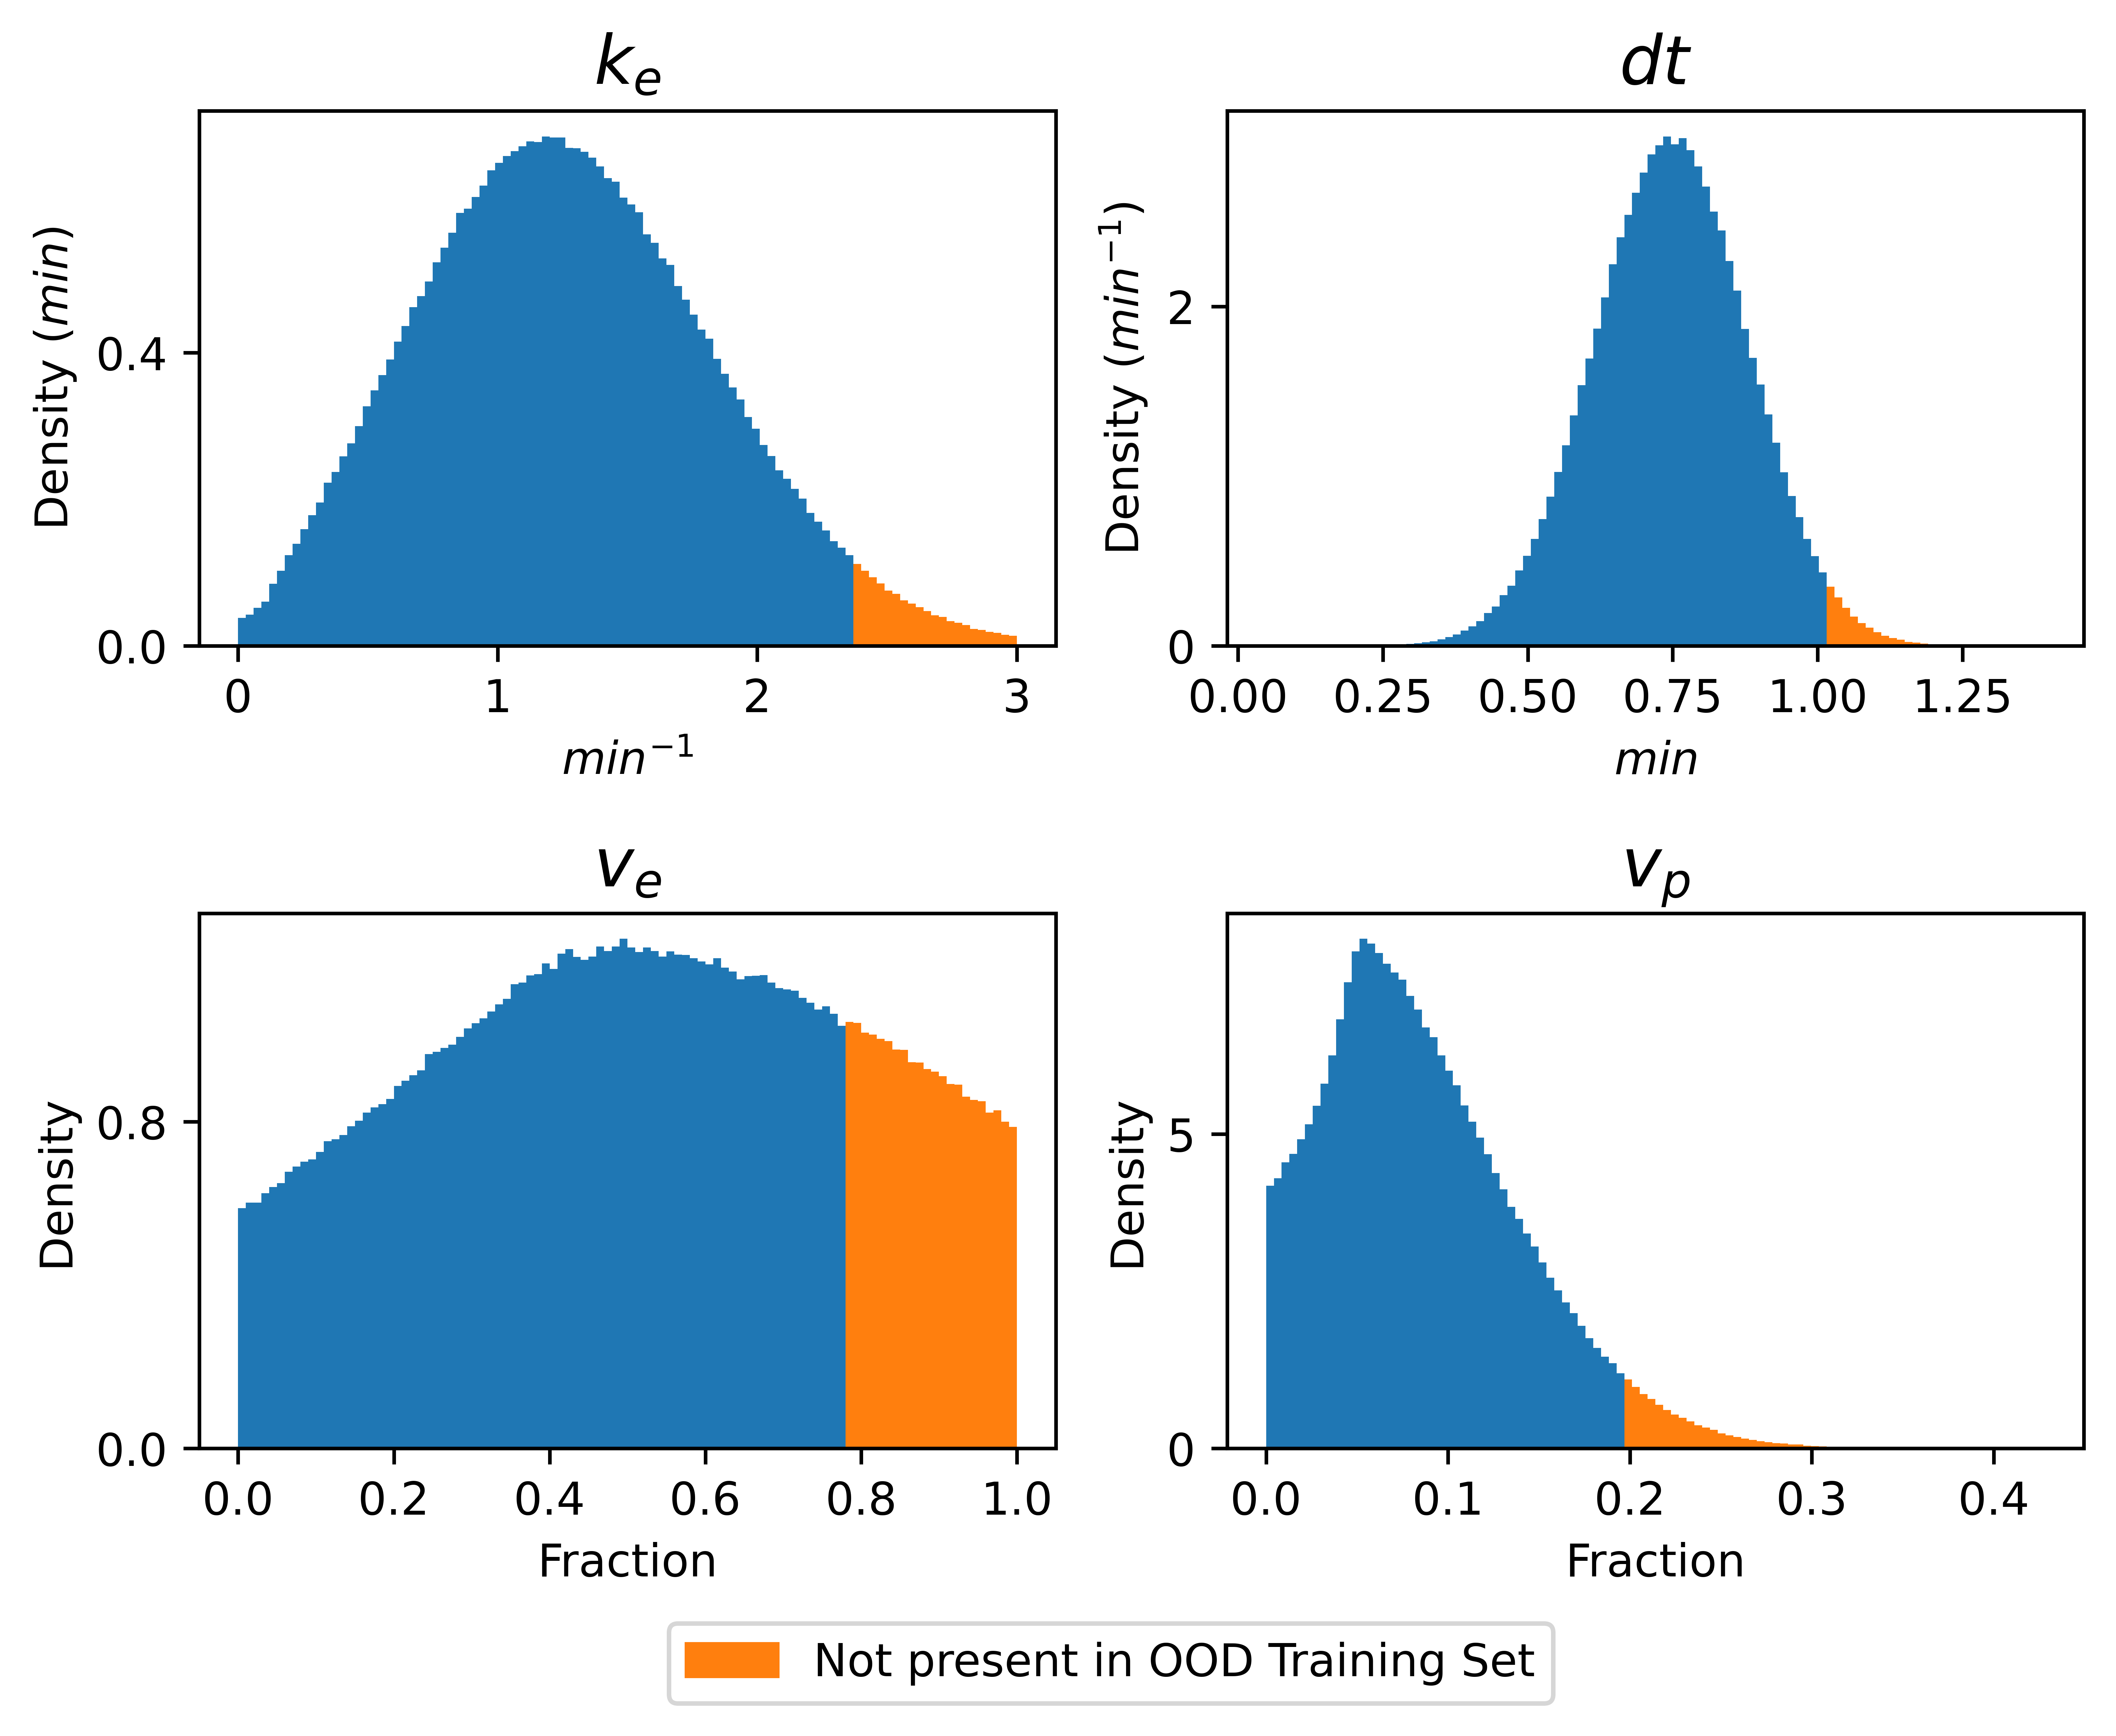

In [61]:
fig, axs = plt.subplots(2, 2, dpi=1000, sharey=False)
fig.set_size_inches(width_in_inches, width_in_inches * 5 / 7)
import matplotlib.patches as mpatches

for i, axi in enumerate(axs.flat):
    data_normal = normal["params"][:, i]
    data_ood = ood["params"][:, i]
    
    max_ood = np.max(data_ood)

    bins = np.histogram_bin_edges(data_normal, bins=100)
    hist_vals, _ = np.histogram(data_normal, bins=bins, density=True)

    bin_centers = (bins[:-1] + bins[1:]) / 2
    bin_widths = np.diff(bins)

    # Choose bar colors based on OOD threshold
    colors = [colors_tab10[1] if center > max_ood else colors_tab10[0] for center in bin_centers]

    axi.bar(bin_centers, hist_vals, width=bin_widths, align='center', color=colors)

    axi.set_title(param_names[i], fontsize=title_font_size)
    axi.set_xlabel(param_units[i], fontsize=axis_font_size)
    axi.yaxis.set_major_locator(plt.MaxNLocator(2))
    #set y label
    if i in [0, 1]: # ve and vp are unitless
        axi.set_ylabel(f"Density ({inv_param_units[i]})", fontsize=axis_font_size)
    else:
        axi.set_ylabel(f"Density")
    
fig.subplots_adjust(hspace=0.5)

# Create custom legend handles
legend_handles = [
    # mpatches.Patch(color='blue', label='Normal train / test set'),
    mpatches.Patch(color=colors_tab10[1], label='Not present in OOD Training Set')
]

fig.legend(
    handles=legend_handles,
    loc="lower center",
    fontsize=axis_font_size,
    ncol=1,
    bbox_to_anchor=(0.5, -0.05)
)

if save:
    plt.savefig(f"{outpath}/methods/histograms.jpg", dpi=1000, format="jpg", bbox_inches='tight')

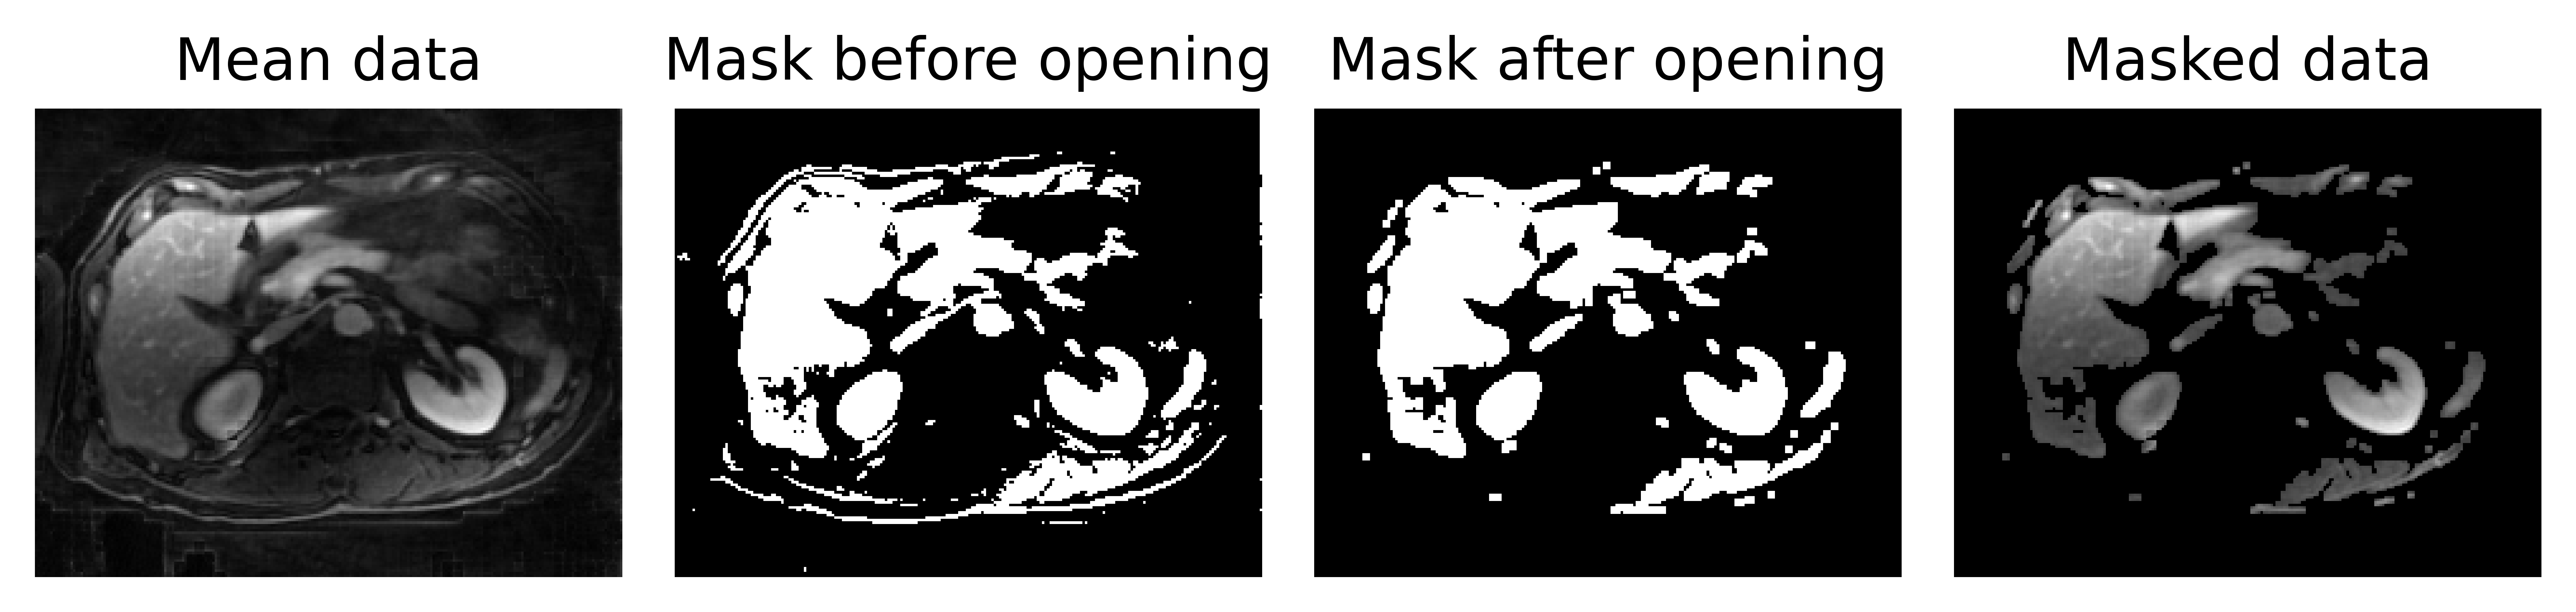

In [62]:
data=pickle.load(open("data/vivo/randslice_data.pkl", 'rb'))
mean_data = data.mean(axis=-1)
cutoff = np.percentile(mean_data, 75)
mask = (mean_data > cutoff).numpy()
# do opening and closing over mask
kernel = np.ones((3,3), np.uint8)
mask_f = cv2.morphologyEx(mask.astype(np.uint8), cv2.MORPH_OPEN, kernel)


fig, axs = plt.subplots(1,4, dpi=1000,figsize=(width_in_inches, width_in_inches/4))
axs[0].imshow(data.mean(axis=-1), cmap="gray")
axs[0].set_title("Mean data")
axs[1].imshow(mask, cmap="gray")
axs[1].set_title("Mask before opening")
axs[2].imshow(mask_f, cmap="gray")
axs[2].set_title("Mask after opening")
axs[3].imshow(data.mean(axis=-1) *mask_f, cmap="gray")
axs[3].set_title("Masked data")
for ax in axs:
    ax.axis("off")
plt.tight_layout()

if save:
    plt.savefig(f"{outpath}/methods/masking.jpg", dpi=1000, format="jpg", bbox_inches="tight")

In [63]:
normal.keys()

KeysView(NpzFile 'data/sim/normal/test.npz' with keys: params, concentrations, snr)

In [64]:
# get a curve where normal['params'][:,2] is minimal and where normal['params'][:,2] is maximal

min_value = np.min(normal["params"][:,1])
max_value = np.max(normal["params"][:,1])
min_index = np.argmin(normal["params"][:,1])
max_index = np.argmax(normal["params"][:,1])

min_curve = normal["concentrations"][min_index]
max_curve = normal["concentrations"][max_index]

print(min_value, max_value)

print((max_value-min_value) * 60 / 4)



0.04837069385076831 1.3920832463259518
20.155688287127752


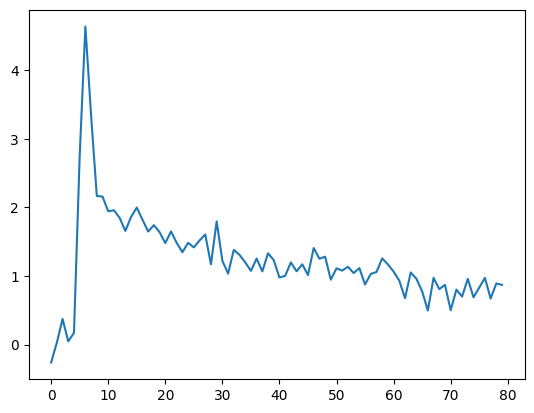

In [18]:
plt.plot(min_curve)

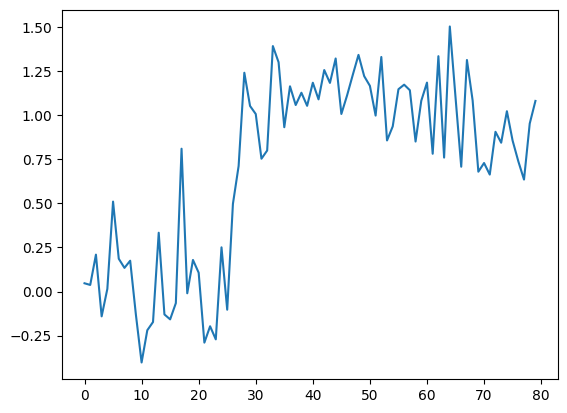

In [19]:
plt.plot(max_curve)